In [ ]:
!pip install --upgrade yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the date ranges
trump_start_1 = '2017-01-20'  # Start of Trump's presidency
trump_end_1 = '2021-01-20'    # End of Trump's presidency
biden_start = '2021-01-20'  # Start of Biden's presidency
biden_end = '2025-01-20'    # End of Biden's presidency
trump_start_2 = '2017-01-20'  # Start of Trump's presidency 2

# Download S&P 500 data
sp500_1 = yf.download('^GSPC', start=trump_start_1, end=trump_end_1,auto_adjust=False)
sp500_2= yf.download('^GSPC', start=trump_end_1, end=biden_end,auto_adjust=False)
sp500_3= yf.download('^GSPC', start=biden_end,auto_adjust=False)

# Calculate daily returns
sp500_1['Daily_Return'] = sp500_1['Adj Close'].pct_change()
sp500_2['Daily_Return'] = sp500_2['Adj Close'].pct_change()
sp500_3['Daily_Return'] = sp500_3['Adj Close'].pct_change()

# Calculate cumulative returns for each period
sp500_1['Trump_Cum_Return'] = (1 + sp500_1['Daily_Return'][trump_start_1:trump_end_1]).cumprod() - 1
sp500_2['Biden_Cum_Return'] = (1 + sp500_2['Daily_Return'][biden_start:biden_end]).cumprod() - 1
sp500_3['Trump_Cum_Return'] = (1 + sp500_3['Daily_Return']).cumprod() - 1

# Retirando el indice
sp500_1.reset_index(inplace=True)
sp500_2.reset_index(inplace=True)
sp500_3.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


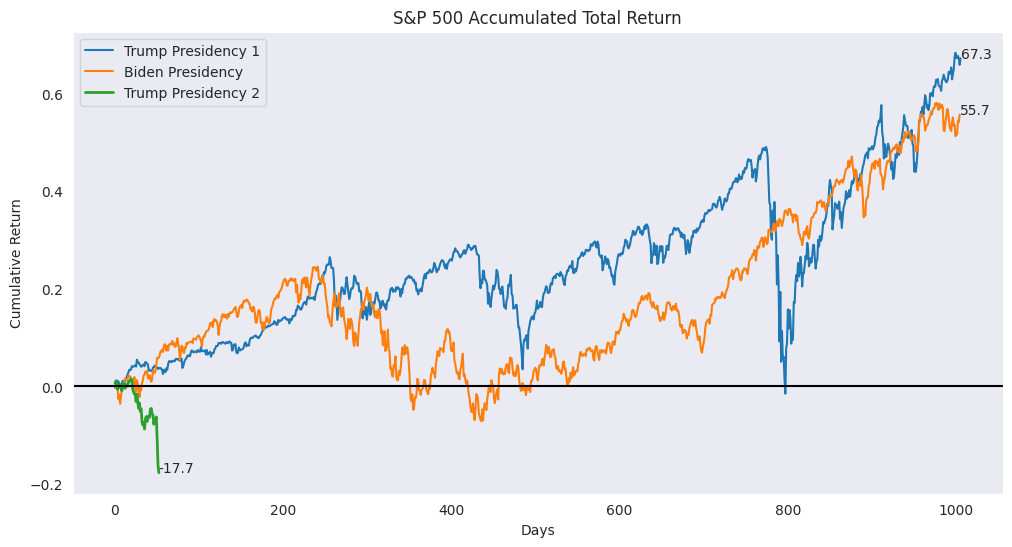

In [ ]:
# Plot the cumulative returns
plt.figure(figsize=(12, 6))
sns.set_style('dark')
plt.plot(sp500_1.index, sp500_1['Trump_Cum_Return'], label='Trump Presidency 1')
plt.plot(sp500_2.index, sp500_2['Biden_Cum_Return'], label='Biden Presidency')
plt.plot(sp500_3.index, sp500_3['Trump_Cum_Return'], label='Trump Presidency 2',linewidth=2)
plt.text(sp500_1.index[-1],sp500_1['Trump_Cum_Return'].iloc[-1],round(sp500_1['Trump_Cum_Return'].iloc[-1]*100,1),fontsize=10)
plt.text(sp500_2.index[-1],sp500_2['Biden_Cum_Return'].iloc[-1],round(sp500_2['Biden_Cum_Return'].iloc[-1]*100,1),fontsize=10)
plt.text(sp500_3.index[-1],sp500_3['Trump_Cum_Return'].iloc[-1],round(sp500_3['Trump_Cum_Return'].iloc[-1]*100,1),fontsize=10)
plt.title('S&P 500 Accumulated Total Return')
plt.axhline(y=0,color='black')
plt.xlabel('Days')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

In [ ]:
sp500_1.reset_index(inplace=True)
sp500_2.reset_index(inplace=True)

In [ ]:
sp500_1

Price,index,Date,Adj Close,Close,High,Low,Open,Volume,Daily_Return,Trump_Cum_Return
Ticker,,,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,
0,0,2017-01-20,2271.310059,2271.310059,2276.959961,2265.010010,2269.959961,3536850000,NaN,NaN
1,1,2017-01-23,2265.199951,2265.199951,2271.780029,2257.020020,2267.780029,3155240000,-0.002690,-0.002690
2,2,2017-01-24,2280.070068,2280.070068,2284.629883,2266.679932,2267.879883,3816950000,0.006565,0.003857
3,3,2017-01-25,2298.370117,2298.370117,2299.550049,2288.879883,2288.879883,3849340000,0.008026,0.011914
4,4,2017-01-26,2296.679932,2296.679932,2300.989990,2294.080078,2298.629883,3611510000,-0.000735,0.011170
...,...,...,...,...,...,...,...,...,...,...
1001,1001,2021-01-12,3801.189941,3801.189941,3810.780029,3776.510010,3801.620117,4994950000,0.000416,0.673567
1002,1002,2021-01-13,3809.840088,3809.840088,3820.959961,3791.500000,3802.229980,4602510000,0.002276,0.677376
1003,1003,2021-01-14,3795.540039,3795.540039,3823.600098,3792.860107,3814.979980,5198480000,-0.003753,0.671080


In [ ]:
sp500_2

Price,index,Date,Adj Close,Close,High,Low,Open,Volume,Daily_Return,Biden_Cum_Return
Ticker,,,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,
0,0,2021-01-20,3851.850098,3851.850098,3859.750000,3816.219971,3816.219971,4566190000,NaN,NaN
1,1,2021-01-21,3853.070068,3853.070068,3861.449951,3845.050049,3857.459961,4501760000,0.000317,0.000317
2,2,2021-01-22,3841.469971,3841.469971,3852.310059,3830.409912,3844.239990,5110890000,-0.003011,-0.002695
3,3,2021-01-25,3855.360107,3855.360107,3859.229980,3797.159912,3851.679932,7000840000,0.003616,0.000911
4,4,2021-01-26,3849.620117,3849.620117,3870.899902,3847.780029,3862.959961,6137500000,-0.001489,-0.000579
...,...,...,...,...,...,...,...,...,...,...
1000,1000,2025-01-13,5836.220215,5836.220215,5838.609863,5773.310059,5782.020020,4421200000,0.001575,0.515173
1001,1001,2025-01-14,5842.910156,5842.910156,5871.919922,5805.419922,5859.270020,4142280000,0.001146,0.516910
1002,1002,2025-01-15,5949.910156,5949.910156,5960.609863,5905.209961,5905.209961,4544570000,0.018313,0.544689


In [ ]:
sp500_3

Price,Date,Adj Close,Close,High,Low,Open,Volume,Daily_Return,Trump_Cum_Return
Ticker,,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,
0,2025-01-21,6049.240234,6049.240234,6051.509766,6006.879883,6014.120117,4702920000,NaN,NaN
1,2025-01-22,6086.370117,6086.370117,6100.810059,6076.129883,6081.390137,4323040000,0.006138,0.006138
2,2025-01-23,6118.709961,6118.709961,6118.729980,6074.669922,6076.319824,4432250000,0.005313,0.011484
3,2025-01-24,6101.240234,6101.240234,6128.180176,6088.740234,6121.430176,4214250000,-0.002855,0.008596
4,2025-01-27,6012.279785,6012.279785,6017.169922,5962.919922,5969.040039,5198750000,-0.014581,-0.006110
5,2025-01-28,6067.700195,6067.700195,6074.540039,5994.629883,6026.970215,4473640000,0.009218,0.003052
6,2025-01-29,6039.310059,6039.310059,6062.830078,6012.959961,6057.700195,4115310000,-0.004679,-0.001642
7,2025-01-30,6071.169922,6071.169922,6086.640137,6027.459961,6050.750000,4634620000,0.005275,0.003625
8,2025-01-31,6040.529785,6040.529785,6120.910156,6030.930176,6096.790039,4843770000,-0.005047,-0.001440
